<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 통계적 머신러닝
    - sklearn

        데이터 분리 : 훈련, 검증, 테스트 (K-Fold, cross_val_score)

        하이퍼파라미터 : GridSearchCV

    - 평가

        정확도, 오차행렬

        정밀도, 재현율

        F1 스코어, ROC 곡선, AUC
    - 분류

        결정트리

        랜덤포레스트(앙상블)
        
        XGBoost

                XGBoost 작동법 이해
                XGBoost 기본 예제 사용
                XGBoost 하이퍼파라미터
                XGBoost와 앙상블
        KNN
        
        SVM

    - 회귀

        선형회귀

        다항회귀

        릿지, 라쏘, 엘라스틱넷

        로지스틱회귀

    - 차원축소 / 군집

        pca

        KMeans

        군집평가, DBSCAN

    - 텍스트 처리

        NLP, BOW

        텍스트 분류

        감성분석

        문서유사도

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
y = np.array([-1,-1, -1, 1, 1 , 1 ])

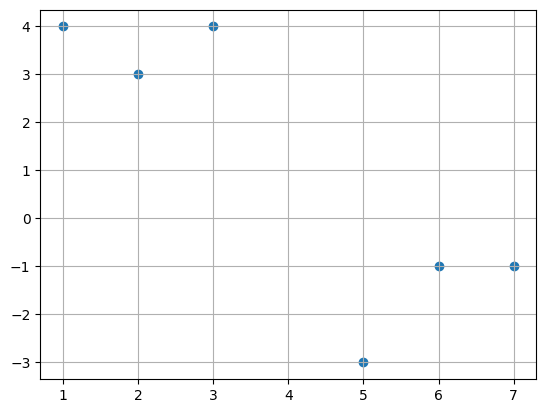

In [ ]:
plt.scatter(X[:,0], X[:, 1])
plt.grid()

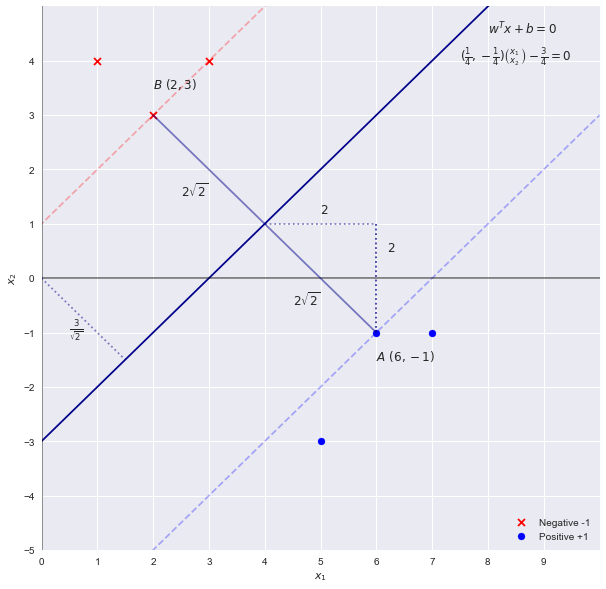

위 그림에서 가운데 직선만 생각했을때, 직관적으로

y = x - 3 을 유추 할 수 있다.

이 식을 위 그래프의 표기법대로 고치면

$$x_2 = x_1 -3 \\
\quad
\\
x_1 + (-1) \times x_2 - 3 = 0 \\
\quad \\
{1 \choose -1}^T {x_1 \choose x_2} - 3 = 0
\quad \\
\therefore \ w = (1, -1), \ \ b=-3
$$


$${\vec{w} \over |\vec{w}| } \cdot ( \vec{x}_+ - \vec{x}_-) =  {1 \over |\vec{w}|}(\vec{w} \cdot \vec{x}_+ - \vec{w} \cdot \vec{x}_-) = {2 \over |\vec{w}|} \quad : \quad margin $$

$$
{2 \over |\vec{w}|} = { 2 \over \sqrt 2} = \sqrt 2
$$

scalling : 매개변수를 추정하기 위해 차원이나 크기를 조정하는 일

$$
c x_1 - c x_2 - 3 c = 0 \\
\\
\therefore w = (c, -c), b=-3c \\
\\
|\vec{w}| = c \sqrt 2 \quad \\
\\
{2 \over |\vec{w}|} = {2 \over {c \sqrt 2}}= 4 \sqrt 2
$$

$$
c = {1 \over 4}
$$

일반적으로, $(\vec{w} \cdot \vec{x} +b ) -1 =0$ 와 같은 식이 있다고 가정하면,

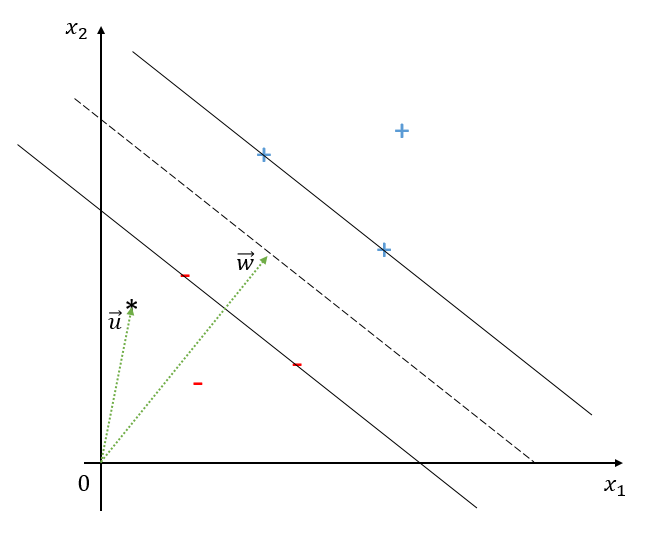

조건 1) 점선 아래에 있으면 -, 위에 있으면 +

In [ ]:
X

array([[ 3,  4],
       [ 1,  4],
       [ 2,  3],
       [ 6, -1],
       [ 7, -1],
       [ 5, -3]])

In [ ]:
y

array([-1, -1, -1,  1,  1,  1])

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [ ]:
clf.coef_ #(w0, w1)

array([[ 0.25, -0.25]])

In [ ]:
clf.intercept_ # b

array([-0.75])

In [ ]:
w0 = clf.coef_[0, 0]

In [ ]:
w1

-0.25

In [ ]:
w1 = clf.coef_[0, 1]

In [ ]:
b = clf.intercept_[0]

In [ ]:
b

-0.75

In [ ]:
b

-0.75

$$ w_0 x_0 + w_1 x_1 + b -1 = 0 \\
\quad \\
w_1 x_1 = - w_0 x_0 - b + 1 \\
\quad \\
x_1 = -\frac{w_0}{w_1}x_0 - \frac{1}{w_1} b + \frac{1}{w_1}
$$

In [ ]:
#ax + b 에서 a 값과 b 값 산출하기
a = -w0/w1
b = -b/w1

In [ ]:
a

1.0

In [ ]:
b

-3.0

In [ ]:
half_margin = 1/w1

In [ ]:
x_data = np.arange(11)

In [ ]:
hyperline = a*x_data + b
up_line = hyperline + half_margin
down_line = hyperline - half_margin

In [ ]:
y==-1

array([ True,  True,  True, False, False, False])

In [ ]:
hyperline

array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

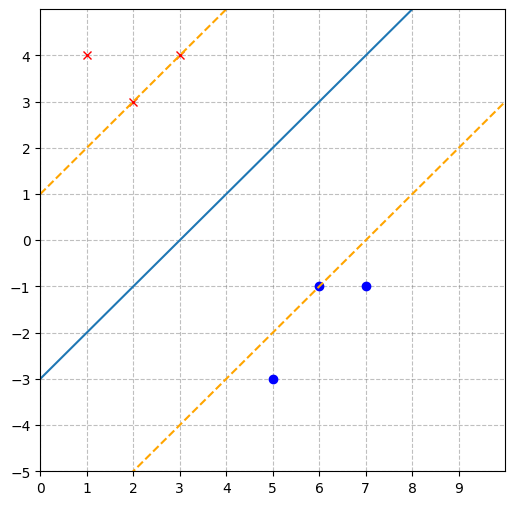

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], 'rx')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bo')
plt.plot(x_data, hyperline)
plt.plot(x_data, up_line, '--', color='orange')
plt.plot(x_data, down_line, '--', color='orange')
plt.ylim(-5, 5)
plt.xlim(0, 10)
plt.yticks(np.arange(plt.ylim()[0], plt.ylim()[1], 1))
plt.xticks(np.arange(plt.xlim()[0], plt.xlim()[1], 1))
plt.grid(True, color='gray', alpha=0.5, linestyle='--')

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=156)

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

SVC()

In [ ]:
svc.score(X_train, y_train)

0.9225352112676056

In [ ]:
svc.score(X_test, y_test)

0.9020979020979021

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train_scaled, y_train)

SVC()

In [ ]:
svc.score(X_train_scaled, y_train)

0.9906103286384976

In [ ]:
svc.score(X_test_scaled, y_test)

0.9370629370629371

스케일 변환의 영향

In [ ]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

clf = SVC(kernel='linear', C=100)

(0.0, 6.0, 0.0, 90.0)

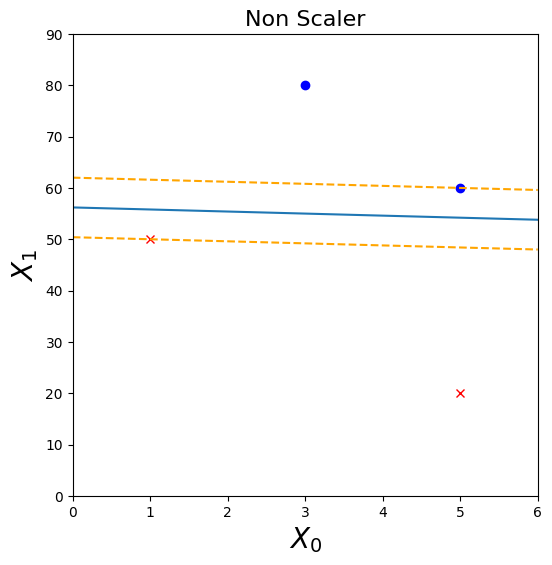

In [ ]:
clf = SVC(kernel = 'linear', C = 100)
clf.fit(Xs,ys)

w0 = clf.coef_[0,0]
w1 = clf.coef_[0,1]

b = clf.intercept_[0]

a = -w0/w1
b = -b/w1

half_margin = 1/w1

X_data = np.arange(7)

hyperline = a*X_data + b
up_line = hyperline + half_margin
down_line = hyperline - half_margin

plt.figure(figsize=(6,6))
plt.subplot(111)
plt.plot(Xs[:,0][ys==0],Xs[:,1][ys==0],'rx')
plt.plot(Xs[:,0][ys==1],Xs[:,1][ys==1],'bo')
plt.plot(X_data,hyperline)
plt.plot(X_data,up_line,'--',color='orange')
plt.plot(X_data,down_line,'--',color='orange')
plt.xlabel('$X_0$', fontsize=20)
plt.ylabel('$X_1$', fontsize=20, rotation=90)
plt.title('Non Scaler', fontsize=16)
plt.axis([0, 6, 0, 90])


In [ ]:
clf.support_vectors_

array([[ 1., 50.],
       [ 5., 60.]])

In [ ]:
def plot_svc_decision_boundary(clf, xmin, xmax):
    w = clf.coef_[0]
    b = clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    hyperline = -w[0]/w[1]*x0 -b/w[1]

    half_margin=1/w[1]
    up = hyperline + half_margin
    down = hyperline - half_margin

    svs = clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, hyperline, 'k-', linewidth=2)
    plt.plot(x0, up, 'k--', linewidth=2)
    plt.plot(x0, down, 'k--', linewidth=2)

(0.0, 6.0, 0.0, 90.0)

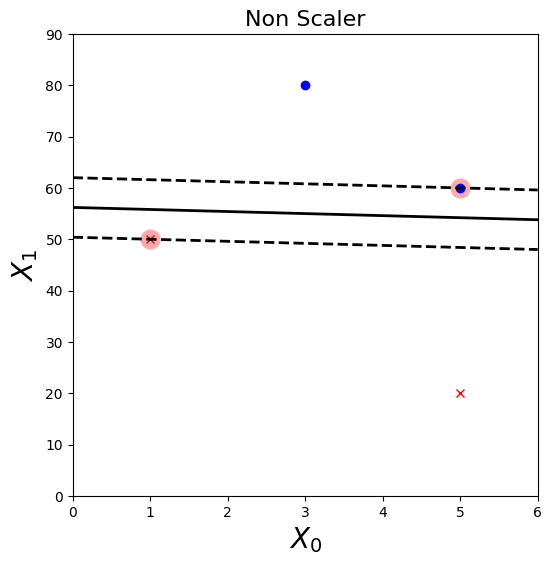

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(111)
plt.plot(Xs[:,0][ys==0],Xs[:,1][ys==0],'rx')
plt.plot(Xs[:,0][ys==1],Xs[:,1][ys==1],'bo')
plot_svc_decision_boundary(clf, 0, 6)
plt.xlabel('$X_0$', fontsize=20)
plt.ylabel('$X_1$', fontsize=20, rotation=90)
plt.title('Non Scaler', fontsize=16)
plt.axis([0, 6, 0, 90])

(-2.0, 2.0, -2.0, 2.0)

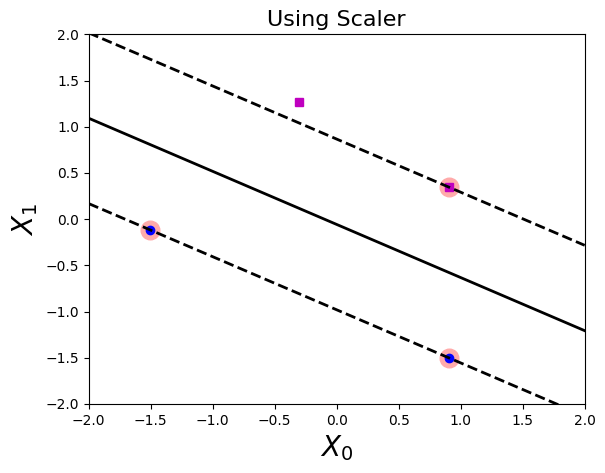

In [ ]:
from sklearn.preprocessing import StandardScaler
clf = SVC(kernel='linear', C=100)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
clf.fit(X_scaled, ys)

plt.subplot(111)
plt.plot(X_scaled[:,0][ys==0],X_scaled[:,1][ys==0],'bo')
plt.plot(X_scaled[:,0][ys==1],X_scaled[:,1][ys==1],'ms')
plot_svc_decision_boundary(clf, -2, 2)
plt.xlabel('$X_0$', fontsize=20)
plt.ylabel('$X_1$', fontsize=20, rotation=90)
plt.title('Using Scaler', fontsize=16)
plt.axis([-2, 2, -2, 2])

In [ ]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.9 MB/s eta 0:00:00


In [ ]:
import mglearn

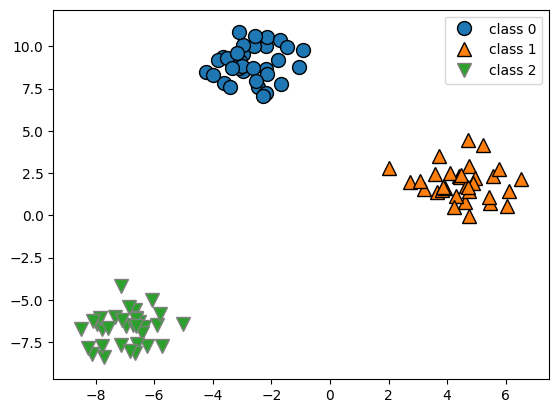

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['class 0', 'class 1', 'class 2'])

In [ ]:
from sklearn.svm import LinearSVC
l_svm = LinearSVC().fit(X, y)

In [ ]:
l_svm.coef_

array([[-0.17492164,  0.23140498],
       [ 0.47621612, -0.06936581],
       [-0.1891436 , -0.20399621]])

In [ ]:
l_svm.intercept_

array([-1.07744582,  0.13140439, -0.0860483 ])

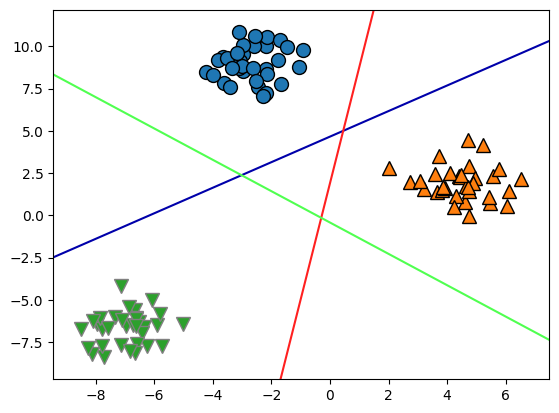

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(l_svm.coef_, l_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)

#커널함수

In [ ]:
np.random.randn(200, 2)[:5]

array([[-0.59865394, -1.11589699],
       [ 0.76666318,  0.35629282],
       [-1.76853845,  0.35548179],
       [ 0.81451982,  0.05892559],
       [-0.18505367, -0.80764849]])

In [ ]:
np.logical_xor(True,False), np.logical_xor(True, True)

(True, False)

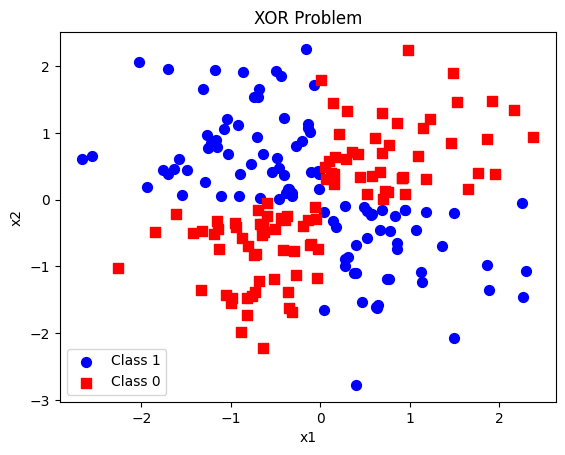

In [ ]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0) # 한개만 참일때 True, 나머지는 False
y_xor = np.where(y_xor, 1, 0) # True 는 1로, 나머지는 0으로 고치기
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], #y_xor==1 인 인덱스는 좌표가 2사분면 아니면 4사분면인 것을 선택하게 해준다.
            c='b', marker='o', label='Class 1', s=50)
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
            c='r', marker='s', label='Class 0', s=50)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR Problem")
plt.show()

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear').fit(X_xor, y_xor)


In [ ]:
import matplotlib as mpl
def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b',
                marker='o', label='클래스 1', s=50)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r',
                marker='s', label='클래스 0', s=50)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

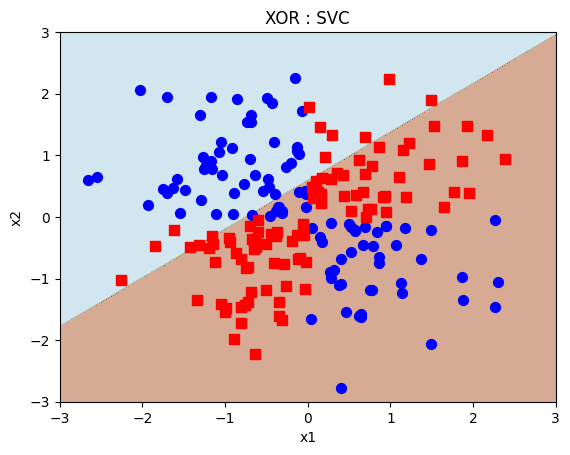

In [ ]:
plot_xor(X_xor, y_xor, svc, 'XOR : SVC')

$$K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)$$


$$
F(x,y) = x^2 + y^2 = (x, y) \cdot (x, y) = \phi(x_i) \cdot \phi(x_j)
$$

$$L = \sum_i \alpha_i - {1 \over 2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j \vec{x}_i \cdot \vec{x}_j$$

$$\vec{w} \cdot \vec{u} + b \ge 0 \\
\quad \\
\\
\vec{w} = \sum_i \alpha_i y_i \vec{x}_i
\\
\sum_i \alpha_i y_i \vec{x}_i \cdot \vec{u} + b \ge 0
$$

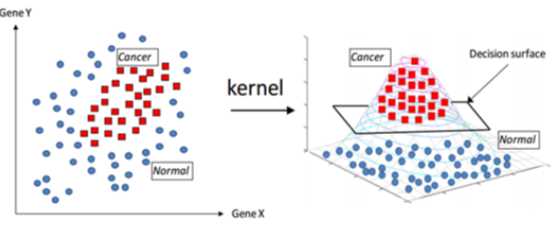

$$\phi(x) = \begin{pmatrix} x_1^2 \\ \sqrt{2} x_1 x_2 \\ x_2^2 \end{pmatrix}$$

(0, 0) = (x1, x2)

(0, 0) => (0, 0, 0)

(0, 1) => (0, 0, 1)

(1, 0) => (1, 0, 0)

(1, 1) => (1, $\sqrt 2$, 1)

    ( 차원 변환 후의 내적 값 ) = (차원 변환 전의 내적 값) * * (차원 수)

Kernel Function 의 정의

$$K(x_i, x_j) = \phi(x_1)\cdot\phi(x_2)$$

The kernel calculates the inner product of two vectors in a difference space.

Polynomial (homogeneous) kernel 의 경우,
$$ K(x_i, x_j) = (x_i \cdot x_j)^d$$

이 된다.



$$ X = < x_1,\ x_2 >,\  Z = <z_1,\ z_2>\ 이고,\
d=1 일때,\  커널\  함수는 $$

$$ $$
$$ K(<x_1,\ x_2>, <z_1,\ z_2>) = <x_1,\ x_2> \cdot <z_1,\ z_2>$$
$$ $$
$$= x_1 z_1 + x_2 z_2$$
$$ $$
$$= X \cdot Z$$
$$ $$

d = 2 일때
$$ K(<x_1,\ x_2>, <z_1,\ z_2>) = <x_1^2,\ \sqrt{2} x_1 x_2,\ x_2^2> \cdot <z_1^2,\ \sqrt{2} z_1 z_2,\  z_2^2>$$
$$ $$
$$ = x_1^2 z_1^2 + 2 x_1 x_2 z_1 z_2 + x_2^2 z_2^2$$
$$ $$
$$=(x_1z_1 + x_2 z_2)^2 = (X \cdot Z) ^2 $$
$$ $$
d = n 일때
$$ K(<x_1,\ x_2>, <z_1,\ z_2>) = (X \cdot Z) ^n$$

로 정의 될 수 있다.


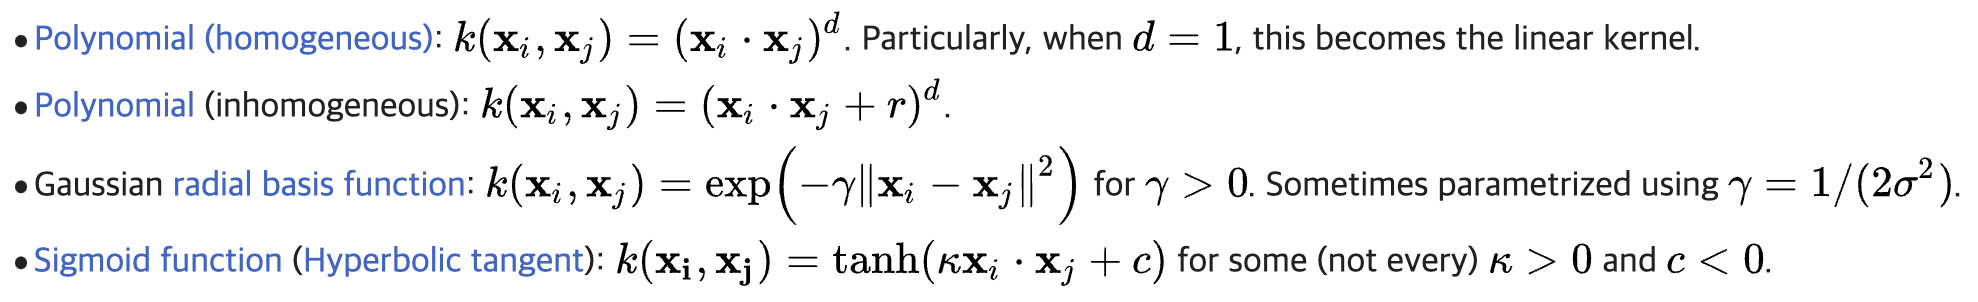

$$\phi(x) = \begin{pmatrix} x_1^2 \\ \sqrt{2} x_1 x_2 \\ x_2^2 \end{pmatrix}$$

In [ ]:
X = np.arange(6).reshape(3, 2)

In [ ]:
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
def basis(X):
    return np.vstack([X[:, 0]**2, np.sqrt(2)*X[:,0]*X[:, 1], X[:, 1]**2]).T

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
FunctionTransformer(basis).fit_transform(X)

array([[ 0.        ,  0.        ,  1.        ],
       [ 4.        ,  8.48528137,  9.        ],
       [16.        , 28.28427125, 25.        ]])

In [ ]:
X_xor

In [ ]:
X_xor2 = FunctionTransformer(basis).fit_transform(X_xor)

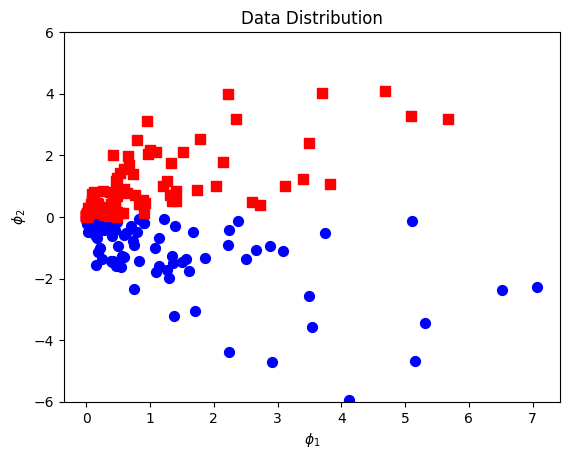

In [ ]:
plt.scatter(X_xor2[y_xor==1, 0], X_xor2[y_xor==1, 1], c='b', marker='o', s=50)
plt.scatter(X_xor2[y_xor==0, 0], X_xor2[y_xor==0, 1], c='r', marker='s', s=50)
plt.ylim(-6, 6)
plt.title("Data Distribution")
plt.xlabel(r"$\phi_1$")
plt.ylabel(r"$\phi_2$")
plt.show()

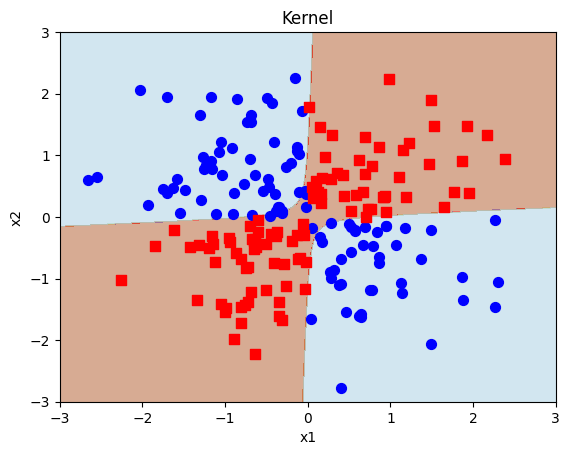

In [ ]:
from sklearn.pipeline import Pipeline

basismodel = Pipeline([('basis', FunctionTransformer(basis)),
                       ('svc', SVC(kernel='linear'))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, 'Kernel')
plt.show()

# RBF 커널

$$ k(x_1, x_2) = \exp \left( -\gamma ||x_1-x_2||^2 \right)$$

$\gamma = {1 \over 2} $

$ ||x_1 || = || x_2|| = 1 $ 로 가정하면

$$
\begin{eqnarray}
k(x_1, x_2)
& = & \exp{\left(-\frac{||x_1 - x_2||^2}{2}\right)} \\
&=& \exp{\left(-\frac{x_1^Tx_1}{2} - \frac{x_2^Tx_2}{2} + x_1^Tx_2 \right)} \\
&=&\exp{\left(-\frac{x_1^Tx_1}{2}\right)}\exp{\left(-\frac{x_2^Tx_2}{2}\right)}\exp{(x_1^Tx_2)} \\
&=& C \exp{(x_1^Tx_2)} \\
& \approx & C \left( 1 + (x_1^Tx_2) + \dfrac{1}{2!}(x_1^Tx_2)^2 +  \dfrac{1}{3!}(x_1^Tx_2)^3 + \cdots \right) \\
\end{eqnarray}
$$

Text(0.5, 1.0, 'RBF Kernel')

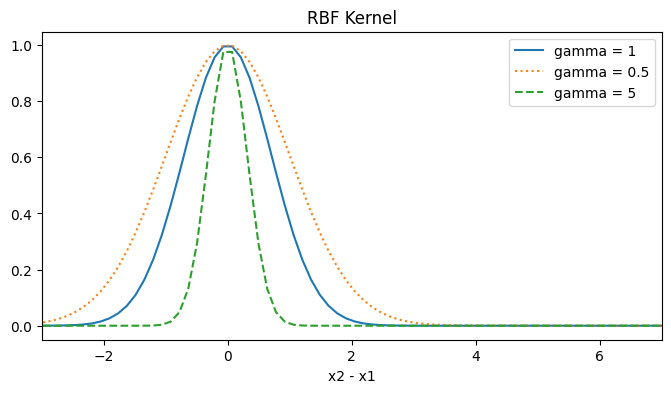

In [ ]:
x1 = 0.0
x2 = np.linspace(-7, 7, 100)

def rbf(x1, x2, gamma):
    return np.exp(-gamma * np.abs(x2 - x1) ** 2)

plt.figure(figsize=(8, 4))
plt.subplot(111)
plt.plot(x2, rbf(x1, x2, 1), ls="-", label="gamma = 1")
plt.plot(x2, rbf(x1, x2, 0.5), ls=":", label="gamma = 0.5")
plt.plot(x2, rbf(x1, x2, 5), ls="--", label="gamma = 5")
plt.xlabel("x2 - x1")
plt.xlim(-3, 7)
plt.legend(loc=1)
plt.title("RBF Kernel")

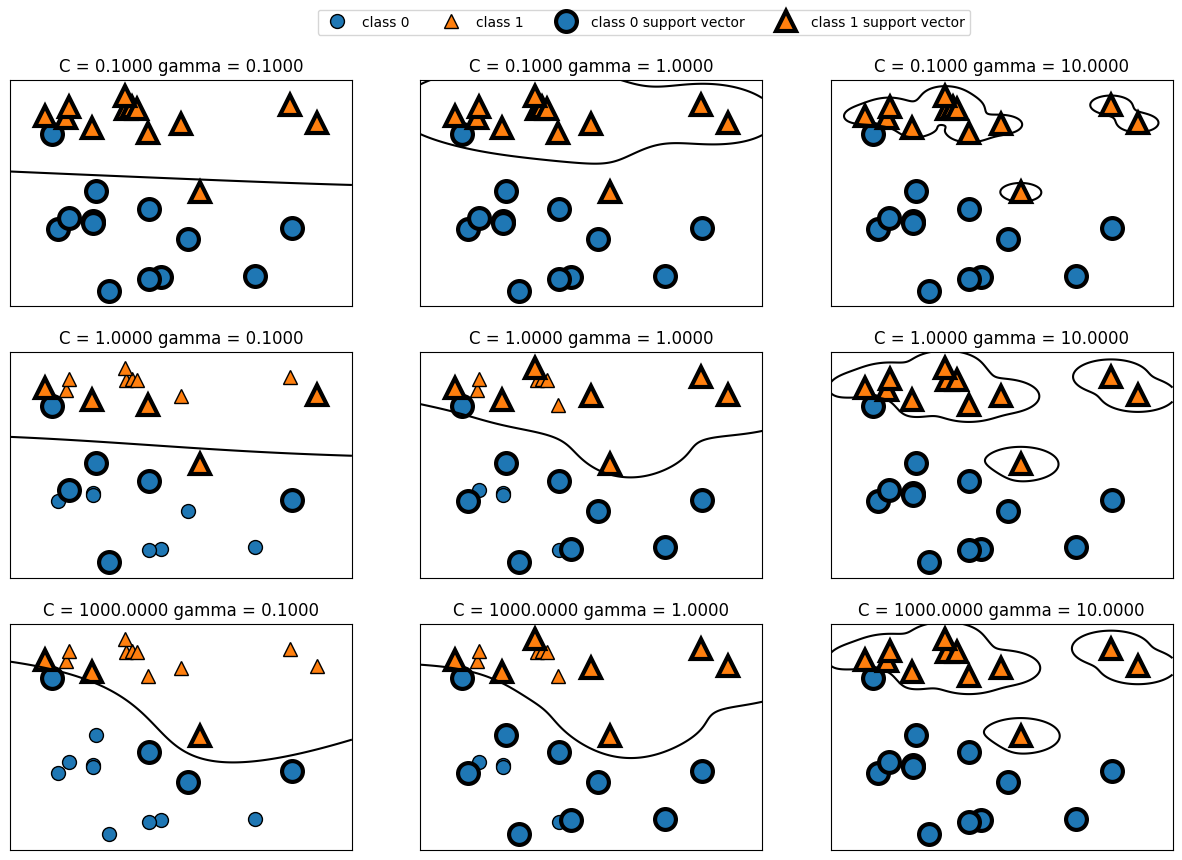

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "class 0 support vector", "class 1 support vector"],
                  ncol=4, loc=(.9, 1.2))

기본값 C = 1, gamma = 1/n_features

예제>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl

In [ ]:
iris = load_iris()

In [ ]:
X= iris.data[:, [2, 3]]

In [ ]:
X[:3]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2]])

In [ ]:
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("patal length")
    plt.ylabel("patal width")
    plt.title(title)

In [ ]:
model1 = SVC(kernel='linear').fit(X_train_std, y_train)
model2 = SVC(kernel='poly', C=1.0, gamma=10, random_state=0).fit(X_train_std, y_train)
model3 = SVC(kernel='rbf', random_state=0, gamma=1, C=1.0).fit(X_train_std, y_train)

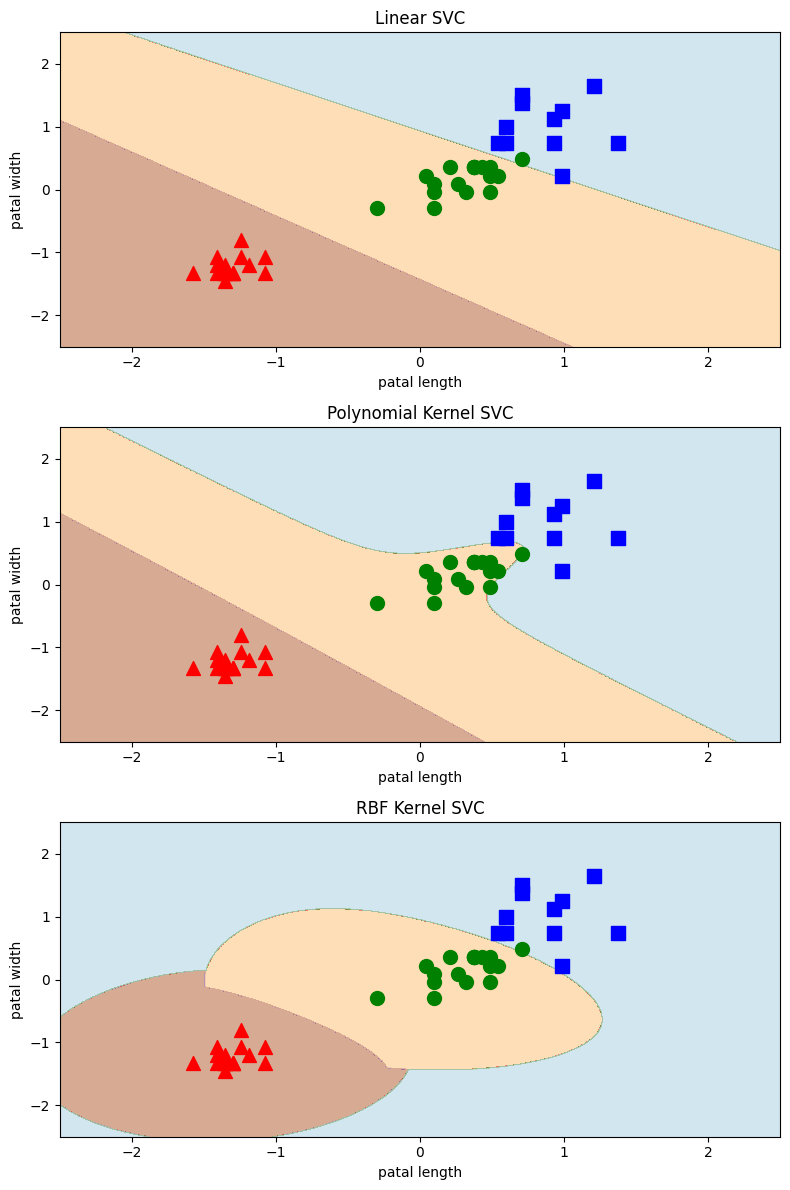

In [ ]:
plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_iris(X_test_std, y_test, model1, 'Linear SVC')
plt.subplot(312)
plot_iris(X_test_std, y_test, model2, 'Polynomial Kernel SVC')
plt.subplot(313)
plot_iris(X_test_std, y_test, model3, 'RBF Kernel SVC')
plt.tight_layout()
plt.show()

In [ ]:
ls ./drive/MyDrive/data/re*

./drive/MyDrive/data/recipes_muffins_cupcakes.csv  ./drive/MyDrive/data/report.txt


In [ ]:
rec = pd.read_csv('./drive/MyDrive/data/recipes_muffins_cupcakes.csv')

In [ ]:
rec

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


1. features : 2 개 선택

2. 결정경계 그림 그리기